In [487]:
import sklearn
print(sklearn.__version__) #check version
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("nfl_pbp.csv")

0.23.2


In [488]:
df = df[['game_date', 'posteam','yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','play_type','score_differential','shotgun','no_huddle']]

df = df.dropna()

df

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
1,2010-09-09,NO,77.0,896.0,1796.0,3596.0,1,1.0,0.0,10,pass,0.0,1,0
2,2010-09-09,NO,49.0,861.0,1761.0,3561.0,1,1.0,0.0,10,pass,0.0,0,0
3,2010-09-09,NO,37.0,821.0,1721.0,3521.0,1,1.0,0.0,10,pass,0.0,1,0
4,2010-09-09,NO,37.0,816.0,1716.0,3516.0,1,2.0,0.0,10,run,0.0,0,0
5,2010-09-09,NO,29.0,784.0,1684.0,3484.0,1,3.0,0.0,2,pass,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453791,2019-12-29,SEA,1.0,22.0,22.0,22.0,4,2.0,1.0,1,no_play,-5.0,0,0
453792,2019-12-29,SEA,5.0,22.0,22.0,22.0,4,2.0,1.0,5,pass,-5.0,1,0
453793,2019-12-29,SEA,5.0,15.0,15.0,15.0,4,3.0,1.0,5,pass,-5.0,1,0
453794,2019-12-29,SEA,5.0,12.0,12.0,12.0,4,4.0,1.0,5,pass,-5.0,1,0


In [489]:
train_df = df[(~df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

test_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

In [490]:
train_df

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
1383,2010-09-12,NE,72.0,758.0,1658.0,3458.0,1,1.0,0.0,10,pass,0.0,1,0
1384,2010-09-12,NE,67.0,719.0,1619.0,3419.0,1,2.0,0.0,5,run,0.0,0,0
1385,2010-09-12,NE,59.0,687.0,1587.0,3387.0,1,1.0,0.0,10,pass,0.0,0,0
1386,2010-09-12,NE,14.0,634.0,1534.0,3334.0,1,1.0,0.0,10,run,0.0,0,0
1387,2010-09-12,NE,9.0,592.0,1492.0,3292.0,1,2.0,0.0,5,pass,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406389,2018-12-30,NE,27.0,263.0,263.0,263.0,4,1.0,0.0,10,run,27.0,0,0
406390,2018-12-30,NE,19.0,227.0,227.0,227.0,4,2.0,0.0,2,pass,27.0,0,0
406392,2018-12-30,NE,17.0,216.0,216.0,216.0,4,1.0,0.0,15,pass,27.0,1,0
406393,2018-12-30,NE,5.0,210.0,210.0,210.0,4,2.0,0.0,3,pass,27.0,0,0


In [491]:
test_df

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
410598,2019-09-08,NE,80.0,896.0,1796.0,3596.0,1,1.0,0.0,10,run,0.0,0,0
410599,2019-09-08,NE,81.0,857.0,1757.0,3557.0,1,2.0,0.0,11,run,0.0,0,0
410600,2019-09-08,NE,74.0,823.0,1723.0,3523.0,1,3.0,0.0,4,run,0.0,1,0
410601,2019-09-08,NE,65.0,794.0,1694.0,3494.0,1,1.0,0.0,10,run,0.0,0,0
410602,2019-09-08,NE,62.0,763.0,1663.0,3463.0,1,2.0,0.0,7,run,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451300,2019-12-29,NE,75.0,24.0,24.0,24.0,4,1.0,0.0,10,pass,-3.0,1,0
451301,2019-12-29,NE,75.0,20.0,20.0,20.0,4,2.0,0.0,10,pass,-3.0,1,0
451303,2019-12-29,NE,63.0,15.0,15.0,15.0,4,1.0,0.0,10,pass,-3.0,1,0
451304,2019-12-29,NE,63.0,9.0,9.0,9.0,4,2.0,0.0,10,pass,-3.0,1,0


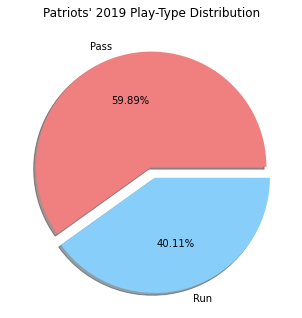

In [492]:
rel_freq = test_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['lightcoral', 'lightskyblue']
plt.pie(rel_freq, labels = ('Pass', 'Run'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)
plt.title("Patriots' 2019 Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [493]:
train_features = train_df[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]
train_label = train_df['play_type']

test_features = test_df[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]
test_label = test_df['play_type']

In [494]:
gradientboostingregressor = ensemble.GradientBoostingClassifier(n_estimators = 75, learning_rate = 0.045)

gradientboostingregressor.fit(train_features, train_label)

GradientBoostingClassifier(learning_rate=0.045, n_estimators=75)

In [495]:
prediction = gradientboostingregressor.predict(test_features)

accuracy = accuracy_score(test_label, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 76.12%


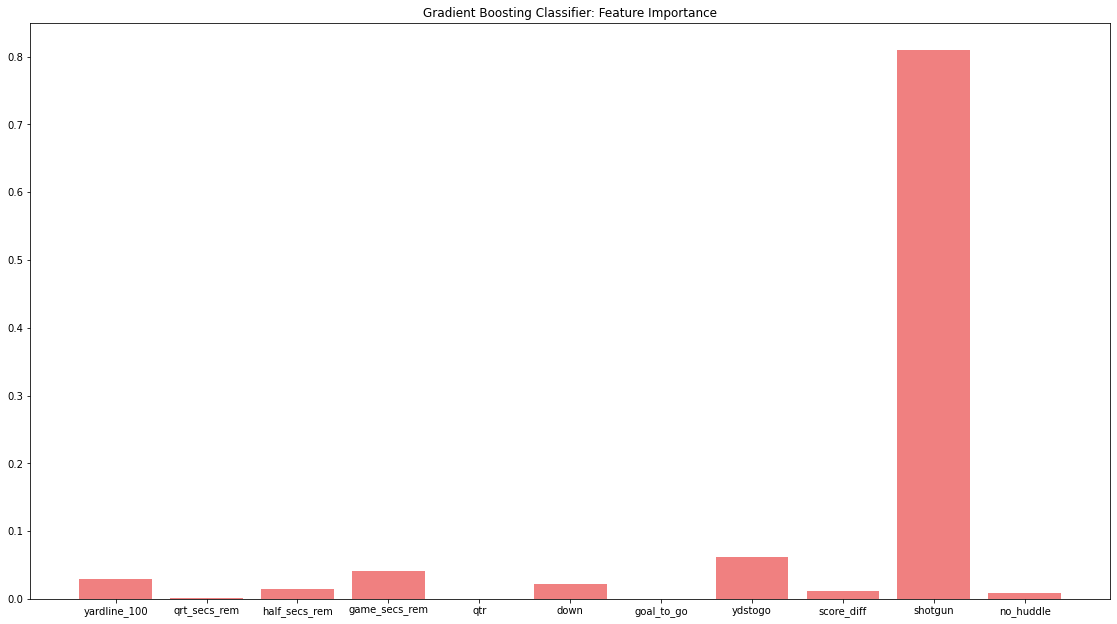

In [496]:
features = ['yardline_100','qrt_secs_rem','half_secs_rem','game_secs_rem','qtr','down','goal_to_go','ydstogo','score_diff','shotgun','no_huddle'] 

feature_importance = gradientboostingregressor.feature_importances_.tolist()

fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2])

ax.bar(features,feature_importance,color=['lightcoral'])
plt.title("Gradient Boosting Classifier: Feature Importance")
plt.show()



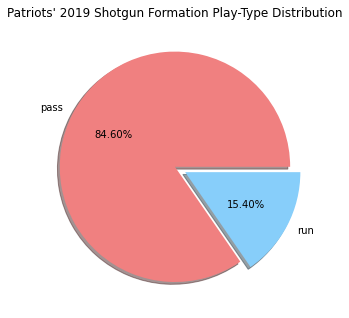

In [497]:
shotgun_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 1)]

relative_frequency = shotgun_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['lightcoral', 'lightskyblue']
plt.pie(relative_frequency, labels = ('pass', 'run'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)

plt.title("Patriots' 2019 Shotgun Formation Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [498]:
df['posteam'].replace('STL','LA',inplace=True)
df['posteam'].replace('SD','LAC',inplace=True)
df['posteam'].replace('JAC','JAX',inplace=True)

len(df.posteam.unique())

results = pd.DataFrame(columns =['accuracy'])

for team in df.posteam.unique():
    
    train_df = df[(~df.game_date.str.contains('2019')) & (df.posteam == team) & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]
    test_df = df[(df.game_date.str.contains('2019')) & (df.posteam == team) & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

    train_features = train_df[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]
    train_label = train_df['play_type']
    
    test_features = test_df[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]
    test_label = test_df['play_type']
    
    prediction = gradientboostingregressor.predict(test_features)
    accuracy = accuracy_score(test_label, prediction)
   
    results.loc[team] = [accuracy]

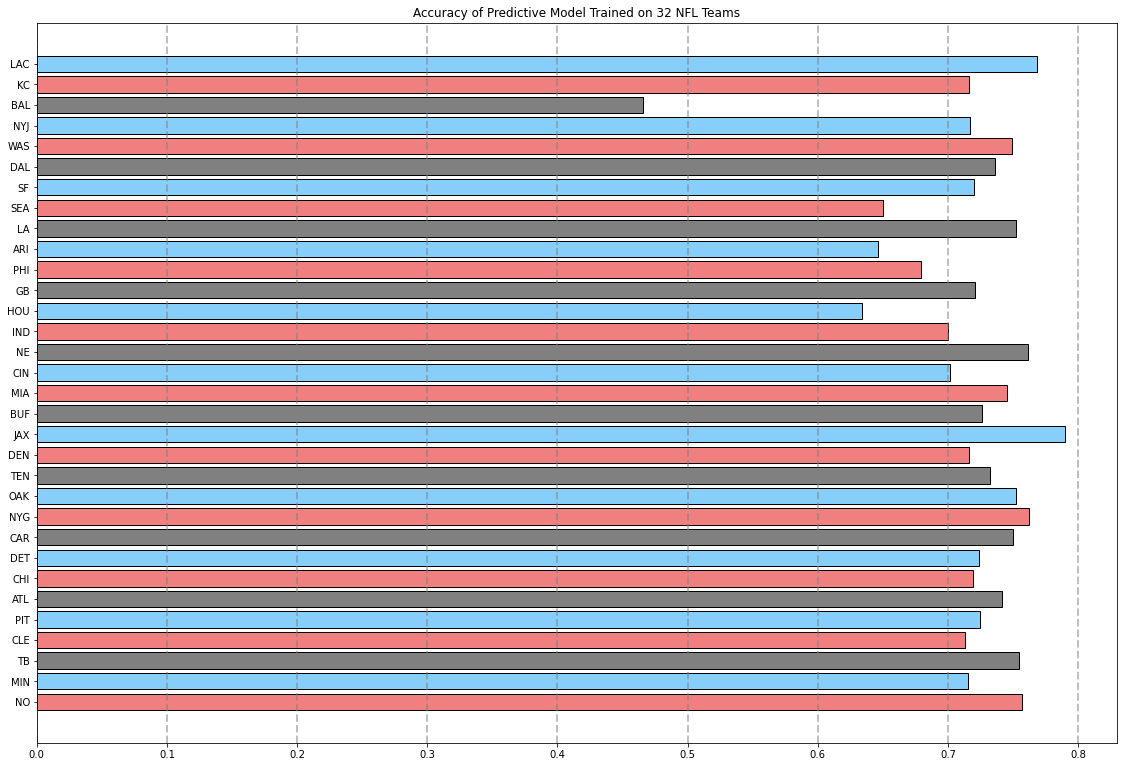

In [499]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
ax.barh(results.index, results.accuracy, color=['lightcoral', 'lightskyblue','grey'],  edgecolor='black')

plt.grid(color='grey', linestyle='--', linewidth=2, axis='x', alpha=0.5)

plt.title("Accuracy of Predictive Model Trained on 32 NFL Teams")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()